# How to Automate Feature Engineering with AI

In this tutorial, we will learn how to automate feature engineering with AI using the Feature Engineering Agent. The Feature Engineering Agent is a powerful tool that can automatically generate features for your data. It analyzes your data and determines necessary actions to prepare it for machine learning including:

- One Hot Encoding
- Missing Value Imputation
- Outlier Detection


### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)


# Table of Contents

1. [How to Automate Feature Engineering with AI](#how-to-automate-feature-engineering-with-ai)
2. [Load Libraries](#load-libraries)
3. [Setup AI and Logging](#setup-ai-and-logging)
4. [Load a Dataset](#load-a-dataset)
5. [Create The Agent](#create-the-agent)
6. [Response](#response)
7. [The feature engineering recipe](#the-feature-engineering-recipe)
8. [Feature Engineer Function](#feature-engineer-function)
9. [Feature Engineered Data As Pandas Data Frame](#feature-engineered-data-as-pandas-data-frame)
10. [Free Generative AI Data Science Workshop](#free-generative-ai-data-science-workshop)

### Load Libraries

In [1]:
# * Libraries

from langchain_openai import ChatOpenAI
import os
import yaml
import pandas as pd
from pprint import pprint

from ai_data_science_team.agents import FeatureEngineeringAgent

### Setup AI and Logging

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [2]:
# * Setup

MODEL    = "gpt-4.1-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model = MODEL)

llm


ChatOpenAI(profile={'max_input_tokens': 1047576, 'max_output_tokens': 32768, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x30c42dcf0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x30d7cf160>, root_client=<openai.OpenAI object at 0x30cb5d9f0>, root_async_client=<openai.AsyncOpenAI object at 0x30d7cf0a0>, model_name='gpt-4.1-mini', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

### Load a Dataset

Next, let's load a customer churn data set that we will clean up. 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/business-science/ai-data-science-team/refs/heads/master/data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Create The Agent

Run this code to create the agent with `make_feature_engineering_agent()`.

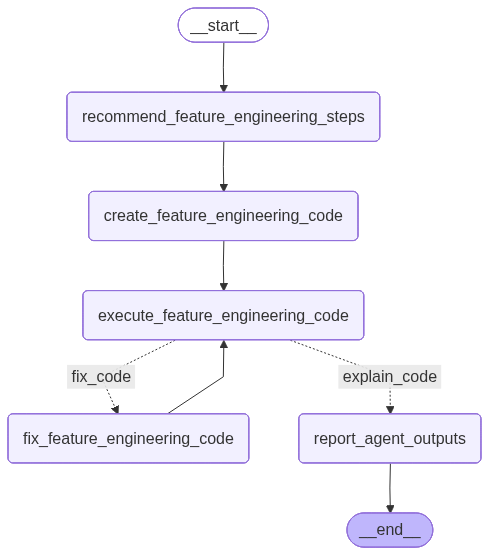

In [4]:
feature_engineering_agent = FeatureEngineeringAgent(
    model = llm, 
    log=LOG, 
    log_path=LOG_PATH
)

feature_engineering_agent

The main inputs to the Feature Engineering Agent are:

- **data_raw**: The raw data to have engineered feature transformations applied.
- **user_instructions**: The data cleaning agent will use these comments to modify the "standard recipe" (optional). See the documentation for the standard feature engineering steps that are evaluated for application by the LLM. 
- **target_variable**: The column name of the target variable (optional).
- **max_retries**: Used to limit the number of attempts to fix the python code generated by the agent. Set this to 3 to limit to 3 attempts. 
- **retry_count**: Set this to 0. 

In [5]:
feature_engineering_agent.invoke_agent(
    data_raw=df,
    user_instructions="Inspect the data. Make any new features and transformations that you think will be useful for predicting the target variable.",
    target_variable="Churn",
    max_retries=3,
    retry_count=0,
)

---FEATURE ENGINEERING AGENT----
    * RECOMMEND FEATURE ENGINEERING STEPS
    * CREATE FEATURE ENGINEERING CODE
      File saved to: /Users/mdancho/Desktop/course_code/ai-data-science-team/logs/feature_engineer.py
    * EXECUTE FEATURE ENGINEERING CODE (SANDBOXED)
    * REPORT AGENT OUTPUTS


### Response

The response produced contains everything we need to understand the data cleaning decisions made and get the cleaned dataset. 

In [6]:
response = feature_engineering_agent.get_response()

list(response.keys())

['messages',
 'user_instructions',
 'recommended_steps',
 'data_raw',
 'data_engineered',
 'target_variable',
 'all_datasets_summary',
 'feature_engineer_function',
 'feature_engineer_function_path',
 'feature_engineer_file_name',
 'feature_engineer_function_name',
 'feature_engineer_error',
 'feature_engineer_error_log_path',
 'max_retries',
 'retry_count']

#### Feature Engineered Data

In [7]:
feature_engineering_agent.get_data_engineered()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,gender_Female,gender_Male,AvgMonthlyCharges,tenure_bin_0-1yr,tenure_bin_1-2yr,tenure_bin_2-4yr,tenure_bin_4-6yr
0,0,1,29.85,29.85,0,1,0,0,1,0,...,1,0,0,1,0,29.850000,True,False,False,False
1,0,34,56.95,1889.50,0,0,1,0,1,0,...,1,0,0,0,1,55.573529,False,False,True,False
2,0,2,53.85,108.15,1,1,0,0,1,0,...,1,0,0,0,1,54.075000,True,False,False,False
3,0,45,42.30,1840.75,0,0,1,0,1,0,...,0,0,1,0,1,40.905556,False,False,True,False
4,0,2,70.70,151.65,1,1,0,0,1,0,...,1,0,0,1,0,75.825000,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,0,1,...,0,0,1,0,1,82.937500,False,True,False,False
7039,0,72,103.20,7362.90,0,0,1,0,0,1,...,1,0,0,1,0,102.262500,False,False,False,True
7040,0,11,29.60,346.45,0,1,0,0,0,1,...,1,0,0,1,0,31.495455,True,False,False,False
7041,1,4,74.40,306.60,1,1,0,0,1,0,...,1,0,0,0,1,76.650000,True,False,False,False


#### Feature Engineer Function

In [8]:
feature_engineering_agent.get_feature_engineer_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: feature_engineering_agent
# Time Created: 2025-12-08 19:43:13

def feature_engineer(data_raw):
    import pandas as pd
    import numpy as np


    df = data_raw.copy()

    # ------------------------
    # Step 1: Drop unique ID
    if 'customerID' in df.columns:
        df.drop(columns=['customerID'], inplace=True)

    # ------------------------
    # Step 2: Convert TotalCharges to numeric with coercion
    # Some entries can be empty strings causing NaN after conversion
    if 'TotalCharges' in df.columns:
        df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    # ------------------------
    # Step 3: Impute missing values in TotalCharges (median)
    if 'TotalCharges' in df.columns:
        if df['TotalCharges'].isnull().any():
            median_total_charges = df['TotalCharges'].median()
            df['TotalCharges'].fillna(median_total_charges, inplace=True)

    # ------------------------
    # Identify target column if present
    target_col = None
    if 'Churn' in df.columns:
        target_col = 'Churn'

    # ------------------------
    # Step 4: Identify binary categorical columns (Yes/No, Male/Female)
    # We'll find object dtype columns with exactly 2 unique values
    binary_cat_cols = []
    for col in df.select_dtypes(include='object').columns:
        if df[col].nunique(dropna=False)==2:
            # typical binary categorical
            binary_cat_cols.append(col)

    # From instructions, also include PaperlessBilling, PhoneService, Partner, Dependents, gender if present
    # These should already be in binary_cat_cols if they are object-dtype and 2 unique values

    # Convert these binary categorical cols to 'category' dtype for consistent handling
    for col in binary_cat_cols:
        df[col] = df[col].astype('category')

    # ------------------------
    # Step 5: Convert SeniorCitizen from int64 (0/1) into integer binary (keep as int)
    # We'll check dtype and unique values
    if 'SeniorCitizen' in df.columns:
        # Ensure values are 0 or 1 and dtype is int
        df['SeniorCitizen'] = df['SeniorCitizen'].astype(np.int8)

    # ------------------------
    # Step 6: High cardinality categorical bucketing for infrequent categories (<5%)
    # Inspect categorical columns (object or category), excluding target, and columns removed
    exclude_cols = [target_col] if target_col else []
    cat_cols = df.select_dtypes(include=['object','category']).columns.difference(exclude_cols).tolist()

    # For each categorical col, group categories with freq < 5% into "Other"
    for col in cat_cols:
        freqs = df[col].value_counts(normalize=True)
        threshold = 0.05
        # Categories to replace with 'Other'
        rare_cats = freqs[freqs < threshold].index
        if len(rare_cats) > 0:
            # If col is categorical, add 'Other' to categories before replace
            if pd.api.types.is_categorical_dtype(df[col]):
                # Add 'Other' if not exists
                if 'Other' not in df[col].cat.categories:
                    df[col] = df[col].cat.add_categories('Other')
            # Replace rare categories with 'Other'
            df.loc[df[col].isin(rare_cats), col] = 'Other'

    # ------------------------
    # Step 7: One-hot encode categorical features (exclude target)
    # Identify categorical columns again (after bucketing)
    cat_cols = df.select_dtypes(include=['object','category']).columns.difference([target_col]).tolist()

    # Use pd.get_dummies for one-hot encoding; drop_first=False to keep all dummies
    # This also handles NaNs by ignoring them in dummy variables
    df = pd.get_dummies(df, columns=cat_cols, dummy_na=False)

    # ------------------------
    # Step 8: Convert boolean/binary columns to int (1/0)
    # After one-hot encoding some columns may remain boolean dtype
    bool_cols = df.select_dtypes(include='bool').columns
    for col in bool_cols:
        df[col] = df[col].astype(np.int8)

    # ------------------------
    # Step 9: Process target variable 'Churn' (label encode)
    if target_col is not None:
        # Map 'No'->0, 'Yes'->1, if target is object dtype
        if df[target_col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[target_col]):
            df[target_col] = df[target_col].map({'No':0, 'Yes':1}).astype(np.int8)

    # ------------------------
    # Step 10: Create new features from tenure and total charges
    # Conditions: tenure column should exist and be numeric, TotalCharges numeric
    if ('tenure' in df.columns) and ('TotalCharges' in df.columns):
        # Avoid division by zero for AvgMonthlyCharges
        df['AvgMonthlyCharges'] = np.where(df['tenure'] > 0,
                                           df['TotalCharges'] / df['tenure'],
                                           0)

        # Create tenure bins (fixed ranges)
        # bins=[0,12,24,48,72], labels=['0-1yr','1-2yr','2-4yr','4-6yr']
        bins = [0, 12, 24, 48, 72]
        labels = ['0-1yr', '1-2yr', '2-4yr', '4-6yr']
        tenure_bins = pd.cut(df['tenure'], bins=bins, labels=labels, right=True, include_lowest=True)
        tenure_bin_col = 'tenure_bin'
        # Convert tenure_bin to category dtype and one-hot encode similarly as above
        df[tenure_bin_col] = tenure_bins.astype('category')
        # One-hot encode tenure_bin
        tenure_bin_dummies = pd.get_dummies(df[tenure_bin_col], prefix=tenure_bin_col)
        df = pd.concat([df.drop(columns=[tenure_bin_col]), tenure_bin_dummies], axis=1)

    # ------------------------
    # Return engineered DataFrame
    return df
```

#### Feature Engineeering Recommended Steps

In [9]:
feature_engineering_agent.get_recommended_feature_engineering_steps(markdown=True)

# Recommended Feature Engineering Steps:
1. **Remove `customerID` due to high cardinality and uniqueness equal to number of rows.**  
   Reason: This ID feature is unique for every entry and doesn't provide predictive power.  
   ```python
   df.drop(columns=['customerID'], inplace=True)
   ```

2. **Convert `TotalCharges` from object to numeric** with coercion for any problematic entries.  
   Reason: `TotalCharges` is numeric but stored as string; model needs numeric type.  
   ```python
   df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
   ```

3. **Check for and handle missing values in `TotalCharges` after conversion** (e.g., fill with median or zero).  
   Reason: Conversion might introduce NaNs if some entries are empty strings or invalid.  

4. **Convert all binary categorical columns (e.g. `gender`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`) with "Yes"/"No" or "Male"/"Female" to consistent categorical types.**  
   Reason: Proper data types help in encoding; some of these can be one-hot encoded or label encoded later if needed.  
   ```python
   # Example: 
   binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
   for col in binary_cols:
       df[col] = df[col].astype('category')
   ```

5. **Convert `SeniorCitizen` from int64 (0/1) into boolean and keep as integer (0/1).**  
   Reason: It's already numeric binary but consider consistency with other binaries.

6. **Identify and encode categorical columns that have more than 5% infrequent categories by grouping infrequent categories into "Other".**  
   Check cardinality for columns like `PaymentMethod` and possibly `InternetService`, `Contract`. However, these have few categories, so likely no grouping needed here.

7. **One-hot encode all relevant categorical features except the target (`Churn`) and columns removed or converted.**  
   Reason: One-hot encoding suits small cardinality categorical variables.  
   Categorical features:  
   - `gender`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`,  
     `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, `PaymentMethod`  

8. **Convert all Boolean or binary columns to integer values (1/0) after one-hot encoding** if any remain as boolean.  
   Reason: Ensures consistent numeric input for ML models.

9. **Process the target variable `Churn`: label encode it as binary (e.g., 1 for "Yes", 0 for "No").**  
   Reason: Target is categorical binary, so labeling is necessary for modeling.  
   ```python
   df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
   ```

10. **Create new features from existing numeric columns:**
    - Create ratio feature `AvgMonthlyCharges` = `TotalCharges` / `tenure` (handle zero tenure carefully).  
      Rationale: This feature could capture average spending and be predictive of churn behavior.  
    - Create tenure bins (e.g., short-term, medium-term, long-term customers) using quantiles or fixed ranges.  
      Rationale: May help model non-linear effects of tenure on churn.

    ```python
    df['AvgMonthlyCharges'] = df.apply(lambda x: x['TotalCharges'] / x['tenure'] if x['tenure'] > 0 else 0, axis=1)
    df['tenure_bin'] = pd.cut(df['tenure'], bins=[0,12,24,48,72], labels=['0-1yr','1-2yr','2-4yr','4-6yr'])
    ```

11. **No datetime columns present, so skip datetime feature engineering.**

12. **No constant columns detected, so no removal needed.**

13. **No additional feature engineering steps required based on data inspection.**  
    Data appears well structured after above transformations; new features from tenure and total charges should improve predictive signal.

---

**Summary:**  
- Drop unique ID column  
- Convert `TotalCharges` to numeric (careful with missing)  
- Encode categorical/binary variables properly  
- One-hot encode multi-category categorical variables  
- Label encode target `Churn`  
- Create new ratio/derived features from `tenure` and `TotalCharges`  
- Convert boolean to int post-encoding  
- No datetime or constant features to handle

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)